In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
X,Y = load_digits(return_X_y=True)
classes = load_digits().target_names
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20, random_state=0)

[]

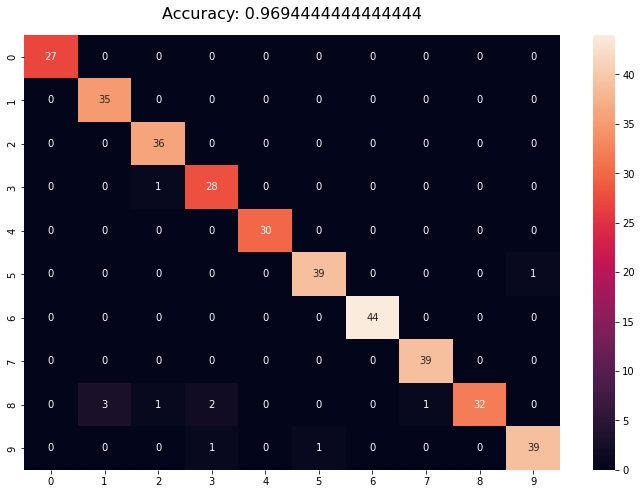

In [12]:
class KNeighborsGama:
    def __init__(self, k=4):
        self.k = k
        self.Xtrain = None
        self.Ytrain = None
        self.dist = lambda x,y: np.sum((x - y)**2)

    def fit(self,Xtrain,Ytrain):
        self.Xtrain = Xtrain
        self.Ytrain = Ytrain

    def predict(self,X):
        labels = []
        for x in X:
            d = []
            #1. Calcular la distancia de los datos X a los datos Xtrain
            for y, label in zip(self.Xtrain, self.Ytrain):
                d.append((self.dist(x,y), label))
            #2. Ordenar las distancias de menor a mayor
            d.sort()
            #3. Calcular la clase de acuerdo a la mayoría de los k vecinos más cercanos
            d = np.array(d[:self.k])[:,1]
            u = np.unique(d)
            lab = u[0]
            labels.append(lab)
        #4. Regresar valores
        return np.array(labels)

kn = KNeighborsGama()
kn.fit(Xtrain, Ytrain)
Ypred = kn.predict(Xtest)

s = f'Accuracy: {accuracy_score(Ytest,Ypred)}'
m = confusion_matrix(Ytest,Ypred)
df = pd.DataFrame(m,index=classes,columns=classes)

fig, ax = plt.subplots(figsize=(12,8))
sb.heatmap(df, annot=True)
ax.set_label(s)
ax.set_title(s,fontsize=16, pad=16)
plt.plot()

[]

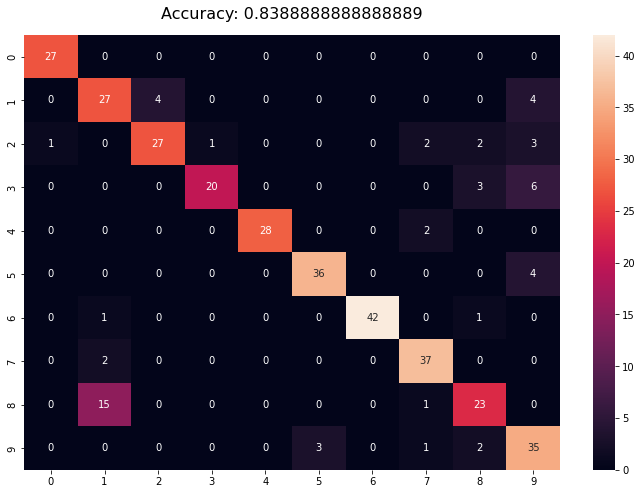

In [13]:
class NearestCentroidGama:
    def __init__(self):
        self.k = []
        self.dist = lambda x,y: np.sum((x - y)**2)

    def fit(self,Xtrain,Ytrain):
        u = np. unique(Ytrain)
        for label_val in u:
            idx = Ytrain == label_val
            X = Xtrain[idx]
            m, idx = -1, -1
            for i,x in enumerate(X):
                dist_sum = 0
                for j,y in enumerate(X):
                    if i==j: continue
                    dist_sum += self.dist(x,y)
                if m == -1 or m > dist_sum: m,idx = dist_sum, i
            self.k.append((X[idx], label_val))
                
    def predict(self,X):
        labels = []
        for x in X:
            d = []
            #1. Calcular la distancia de los datos X a cada centroide
            for y, label in self.k:
                d.append((self.dist(x,y), label))
            #2. Ordenar las distancias de menor a mayor
            d.sort()
            #3. Calcular la clase de acuerdo al centroide mas cercano
            labels.append(d[0][1])
        #4. Regresar valores
        return np.array(labels)

kn = NearestCentroidGama()
kn.fit(Xtrain, Ytrain)
Ypred = kn.predict(Xtest)

s = f'Accuracy: {accuracy_score(Ytest,Ypred)}'
m = confusion_matrix(Ytest,Ypred)
df = pd.DataFrame(m,index=classes,columns=classes)

fig, ax = plt.subplots(figsize=(12,8))
sb.heatmap(df, annot=True)
ax.set_label(s)
ax.set_title(s,fontsize=16, pad=16)
plt.plot()